The file has information about the Weekly Sales of 45 stores for the year 2010-2012 including the factors affectors affecting Sales such as Holidays, Temperature, Fuel Price, CPI, and Unemployment.

Within the Dataset file, following fields are present:
1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a holiday week 1 – Holiday week 0 – Non-holiday week
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate

Holiday Events in the Week
1. Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
2. Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
3. Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12
4. Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

# Our Goal 
**1:Data Wrangling<br> 2: Explore the Data <br> 3: Check if stationay<br>4: Decomposition<br>5: Correlation & Autocorrelation<br>6:Predict Weekly Sales for Stores**


# Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Read Data

In [49]:
data=pd.read_csv('walmart-sales-dataset-of-45stores.csv')

In [8]:
data.shape

(6435, 8)

# We noticed here that there are no columns contain null values 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [13]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [30]:
data.tail(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,5/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


# How Many record Per every Store ? 
# is data balanced for stores ? 

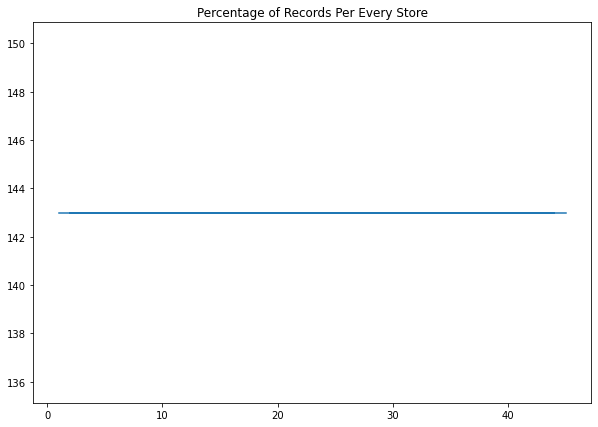

In [192]:
plt.figure(figsize =(10, 7))
data['Store'].value_counts().plot(kind='line')
plt.title('Percentage of Records Per Every Store')
plt.show()

# DataFrame reconigized on data as object and data has many format

In [52]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [56]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [57]:
data['Year']=data['Date'].dt.year

In [58]:
data['Month']=data['Date'].dt.month

In [59]:
data['Day']=data['Date'].dt.day

In [60]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


# Explore Weekly Sales Column

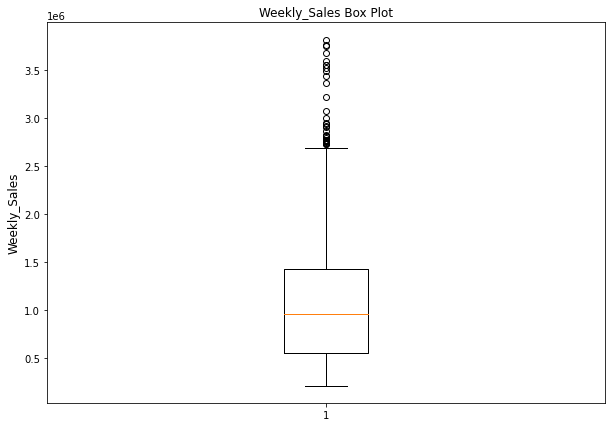

In [66]:
plt.figure(figsize =(10, 7))
plt.boxplot(data['Weekly_Sales'])
plt.title('Weekly_Sales Box Plot')
plt.ylabel('Weekly_Sales',size=12)
plt.show()

In [71]:
# finding the 1st quartile
q1 = np.quantile(data['Weekly_Sales'], 0.25)

# finding the 3rd quartile
q3 = np.quantile(data['Weekly_Sales'], 0.75)
med = np.median(data['Weekly_Sales'])
max_sales=np.max(data['Weekly_Sales'])
min_sales=np.min(data['Weekly_Sales'])
# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

print('Max: ',max_sales)
print('Min: ',min_sales)
print('IQR: ',iqr)
print('Upper Bound: ',upper_bound)
print('Lower Bound: ', lower_bound)


Max:  3818686.45
Min:  209986.25
IQR:  866808.5549999999
Upper Bound:  2720371.4924999997
Lower Bound:  -746862.7275


In [73]:
outliers_weekly_sales=data[(data['Weekly_Sales'] >=upper_bound) | (data['Weekly_Sales'] <=lower_bound)]

In [75]:
outliers_weekly_sales.shape

(34, 11)

# it's mean that store 2 and store 4 has a lagrge weekly sales in the last month of 2010 and 2011

In [154]:
outliers_weekly_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163,2010,12,24
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441,2011,12,23
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127,2010,11,26
474,4,2010-12-17,2740057.14,0,46.57,2.884,126.879484,7.127,2010,12,17
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127,2010,12,24


# Explore Holiday_Flag Column and make sure that has corect values 

In [79]:
holidays_list=['2010-02-12','2011-02-11','2012-02-10'
              ,'2010-09-10','2011-09-09','2012-09-07'
              ,'2010-11-26','2011-11-25','2012-11-23'
              ,'2010-12-31','2011-12-30','2012-12-28']

In [81]:
wrong_flags=data[(data['Date'].isin(holidays_list )) & (data['Holiday_Flag']==0)]

# So Holiday Flag Column has the right values

In [82]:
wrong_flags

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day


# Explore Temprature column

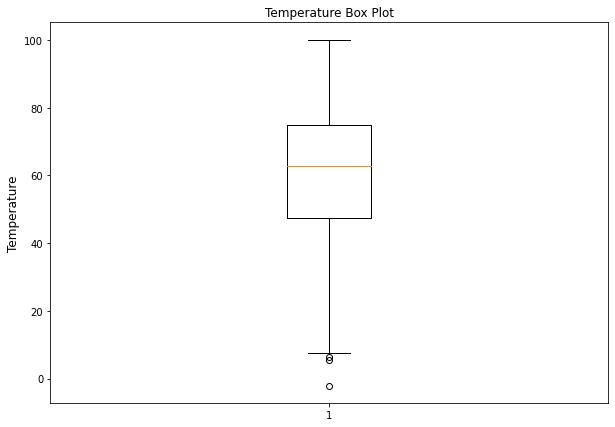

In [85]:
plt.figure(figsize =(10, 7))
plt.boxplot(data['Temperature'])
plt.title('Temperature Box Plot')
plt.ylabel('Temperature',size=12)
plt.show()

In [86]:
# finding the 1st quartile
q1 = np.quantile(data['Temperature'], 0.25)

# finding the 3rd quartile
q3 = np.quantile(data['Temperature'], 0.75)
med = np.median(data['Temperature'])
max_sales=np.max(data['Temperature'])
min_sales=np.min(data['Temperature'])
# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

print('Max: ',max_sales)
print('Min: ',min_sales)
print('IQR: ',iqr)
print('Upper Bound: ',upper_bound)
print('Lower Bound: ', lower_bound)

Max:  100.14
Min:  -2.06
IQR:  27.479999999999997
Upper Bound:  116.16
Lower Bound:  6.240000000000002


In [87]:
outliers_Temperature=data[(data['Temperature'] >=upper_bound) | (data['Temperature'] <=lower_bound)]

In [88]:
outliers_Temperature

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
910,7,2011-02-04,558027.77,0,-2.06,3.011,191.762589,8.818,2011,2,4
2336,17,2011-01-07,1083071.14,0,6.23,2.891,127.191774,6.866,2011,1,7
3626,26,2011-01-28,817485.14,0,5.54,3.243,133.105968,7.907,2011,1,28


# Explore Fuel Price Column

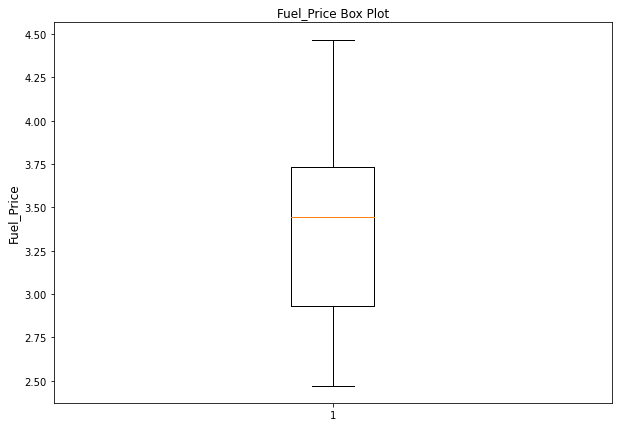

In [90]:
plt.figure(figsize =(10, 7))
plt.boxplot(data['Fuel_Price'])
plt.title('Fuel_Price Box Plot')
plt.ylabel('Fuel_Price',size=12)
plt.show()

# Explore Consumer Per Index Rate

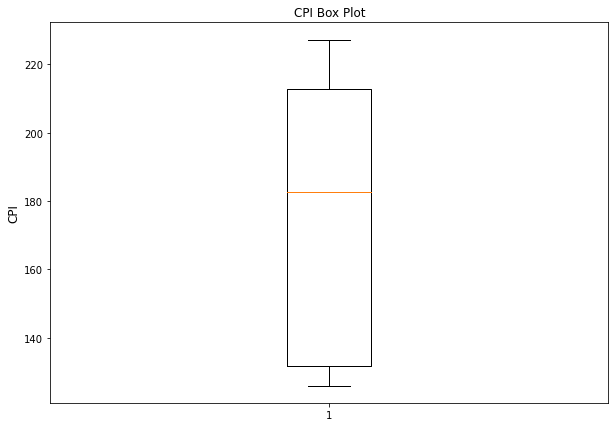

In [92]:
plt.figure(figsize =(10, 7))
plt.boxplot(data['CPI'])
plt.title('CPI Box Plot')
plt.ylabel('CPI',size=12)
plt.show()

# Explore Unemployment Rate

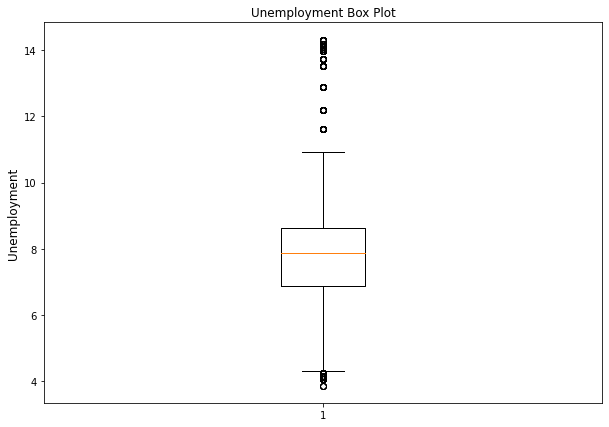

In [94]:
plt.figure(figsize =(10, 7))
plt.boxplot(data['Unemployment'])
plt.title('Unemployment Box Plot')
plt.ylabel('Unemployment',size=12)
plt.show()

In [95]:
# finding the 1st quartile
q1 = np.quantile(data['Unemployment'], 0.25)

# finding the 3rd quartile
q3 = np.quantile(data['Unemployment'], 0.75)
med = np.median(data['Unemployment'])
max_sales=np.max(data['Unemployment'])
min_sales=np.min(data['Unemployment'])
# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

print('Max: ',max_sales)
print('Min: ',min_sales)
print('IQR: ',iqr)
print('Upper Bound: ',upper_bound)
print('Lower Bound: ', lower_bound)

Max:  14.313
Min:  3.879
IQR:  1.7309999999999999
Upper Bound:  11.218499999999999
Lower Bound:  4.2945


In [96]:
outliers_Unemployment=data[(data['Unemployment'] >=upper_bound) | (data['Unemployment'] <=lower_bound)]

In [97]:
outliers_Unemployment

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
555,4,2012-07-06,2224499.28,0,80.37,3.187,130.719633,4.077,2012,7,6
556,4,2012-07-13,2100252.61,0,76.86,3.224,130.683000,4.077,2012,7,13
557,4,2012-07-20,2175563.69,0,79.14,3.263,130.701290,4.077,2012,7,20
558,4,2012-07-27,2048613.65,0,81.06,3.356,130.719581,4.077,2012,7,27
559,4,2012-08-03,2174514.13,0,83.86,3.374,130.737871,4.077,2012,8,3
...,...,...,...,...,...,...,...,...,...,...,...
5715,40,2012-09-28,919595.44,0,50.98,4.018,138.739500,4.156,2012,9,28
5716,40,2012-10-05,1069112.00,0,57.21,4.027,138.825600,4.145,2012,10,5
5717,40,2012-10-12,982523.26,0,47.35,4.029,138.911700,4.145,2012,10,12
5718,40,2012-10-19,918170.50,0,46.33,4.000,138.833613,4.145,2012,10,19


# Find Correlations Between Numerical Columns

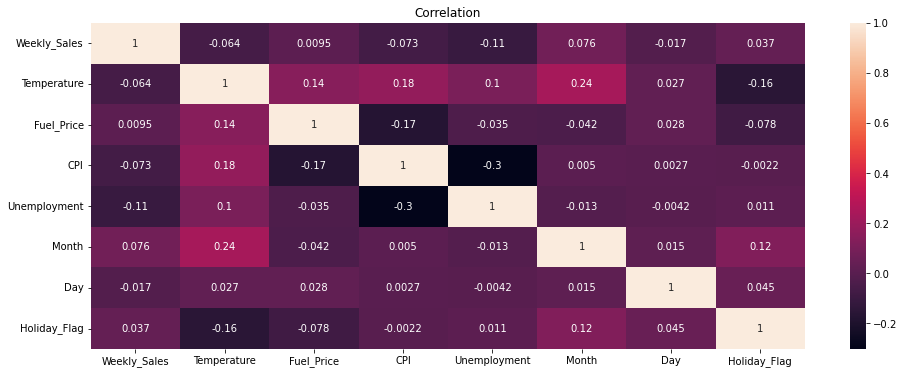

In [112]:
tmp= data[["Weekly_Sales",'Temperature', "Fuel_Price", "CPI", "Unemployment",'Month','Day','Holiday_Flag']].corr()
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(data=tmp, annot=True)
ax.set_title("Correlation")
ax.set_xticklabels(("Weekly_Sales",'Temperature', "Fuel_Price", "CPI", "Unemployment",'Month','Day','Holiday_Flag'))
ax.set_yticklabels(("Weekly_Sales",'Temperature', "Fuel_Price", "CPI", "Unemployment",'Month','Day','Holiday_Flag'))
plt.show()

# Relation Between Unemployement and Sales

# As unemployment increases sales decreases

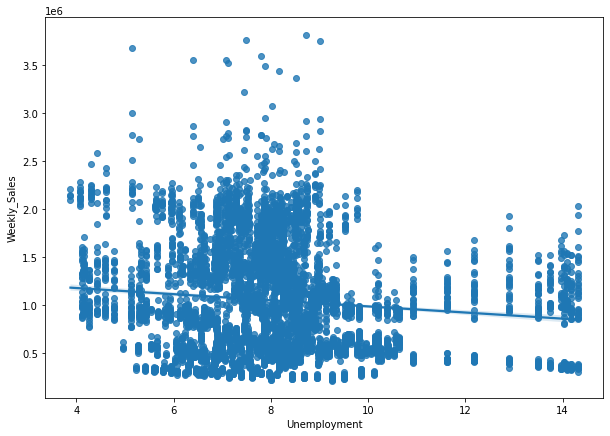

In [156]:
plt.figure(figsize =(10, 7))
sns.regplot(data=data,x="Unemployment",y="Weekly_Sales")

plt.show()

# Which Month has the highest Sales 

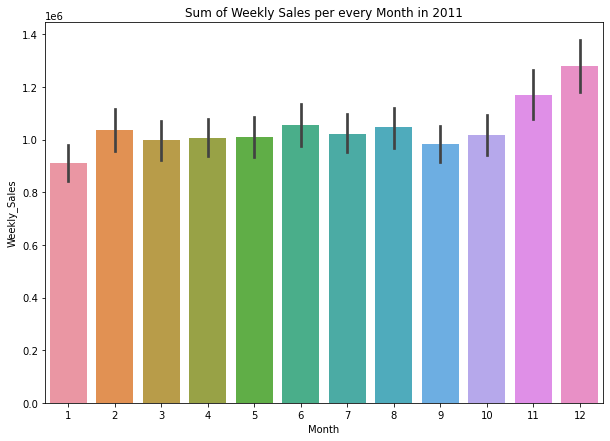

In [158]:
year=2011
plt.figure(figsize =(10, 7))
filter_data=data[data['Year']==year]
sns.barplot(data=filter_data,x="Month",y="Weekly_Sales")
plt.title('Sum of Weekly Sales per every Month in {}'.format(year))
plt.show()

# Find the sum of weekly sales for every store per year

In [174]:
def plot_sales_per_store(store_id):
    plt.figure(figsize =(10, 7))
    gp_data=data[data['Store']==store_id]
    sales_per_store=gp_data.groupby(by=['Date'])["Weekly_Sales"].sum().plot(kind='line')
    plt.title('Weekly Sales Time Line For Store in {}'.format(store_id))
    plt.ylabel('Weekly Sales')
    plt.show()

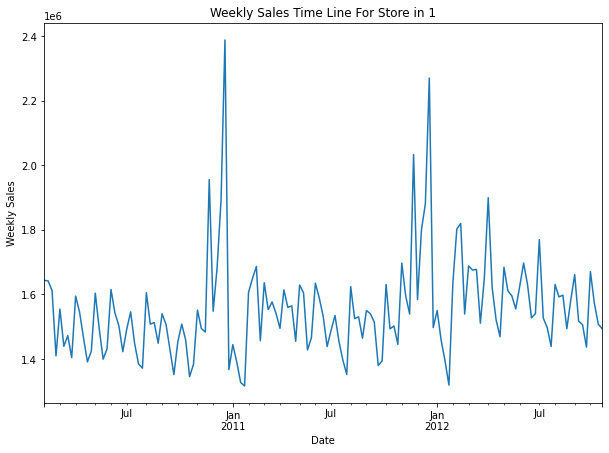

In [178]:
plot_sales_per_store(1)

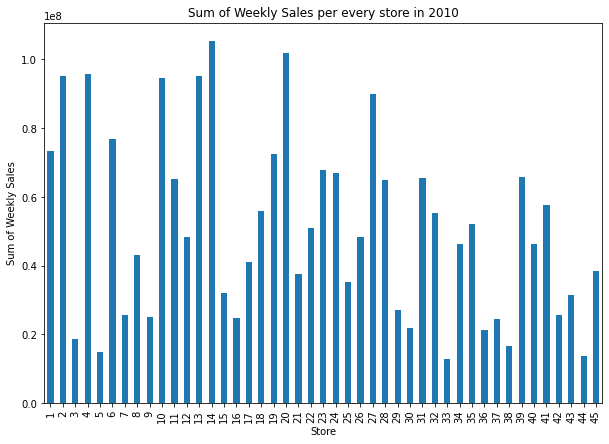

In [161]:
year=2010
plt.figure(figsize =(10, 7))
gp_data=data[data['Year']==year]
sales_per_store=gp_data.groupby(by=['Store'])["Weekly_Sales"].sum().plot(kind='bar')
plt.ylabel('Sum of Weekly Sales')
plt.xticks(rotation=90)
plt.title('Sum of Weekly Sales per every store in {}'.format(year))
plt.show()


# Time Series Analysis

# check if Time Series is seasionality or not ?

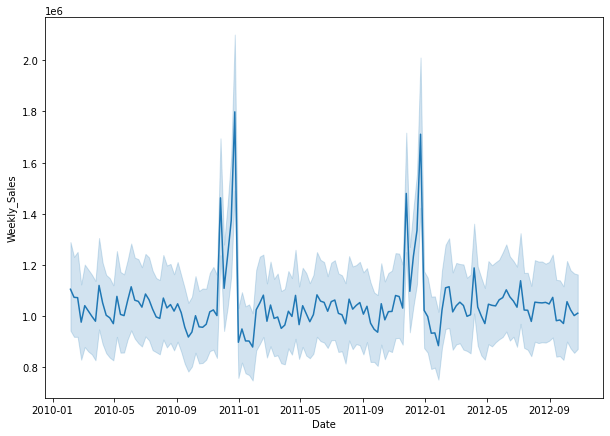

In [179]:
plt.figure(figsize =(10, 7))
sns.lineplot(data=data,x='Date',y='Weekly_Sales')
plt.show()

# Augmented Dickey-Fuller (ADF) Test:

1. Null Hypothesis (H0 ): The series is not stationary : p−value>0.05

2. Alternate Hypothesis (Ha ): The series is stationary : p−value≤0.05

We perform these tests on our time series data and conclude that the time series is not stationary. In order to make it stationary, we need to perform Differencing(making mean constant) and Transformation(making variance constant).

In [184]:
from statsmodels.tsa.stattools import adfuller

for i in data.columns:
    print('Column: ',i)
    result = adfuller(data[i], autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('*'*35)

Column:  Store
ADF Statistic: -0.25450095161116737
p-value: 0.9317057290466672
***********************************
Column:  Date
ADF Statistic: -0.06827016642397017
p-value: 0.952508665224852
***********************************
Column:  Weekly_Sales
ADF Statistic: -4.624149498578306
p-value: 0.00011655869699901148
***********************************
Column:  Holiday_Flag
ADF Statistic: -30.797315014346506
p-value: 0.0
***********************************
Column:  Temperature
ADF Statistic: -6.251851523887287
p-value: 4.434314370458324e-08
***********************************
Column:  Fuel_Price
ADF Statistic: -14.33654935980243
p-value: 1.0776353170266266e-26
***********************************
Column:  CPI
ADF Statistic: -4.923917220807879
p-value: 3.1322557969043435e-05
***********************************
Column:  Unemployment
ADF Statistic: -5.081704127403591
p-value: 1.5256456400034213e-05
***********************************
Column:  Year
ADF Statistic: -15.656795951500769
p-value: 1